# Time-Resolved Photo-Luminescence del PbS 900

Devo leggere tre file. La funzione che se ne occupa in qp2_subroutines è scritta con wrangler.

In [123]:
cartella = 'data/TRPL_PbS900/'
nome1 = 'PbS900_ex-nkt750_em-928e25_50ns_binw100ps_180s.csv'
nome2 = 'PbS900_ex-nkt750_em-928e25_50ns_binw100ps_1800s.csv'
nome3 = 'PbS900_ex-nkt750_em-930e25_1800s_highres.csv'

nomi = [nome1, nome2, nome3]

Capire cosa indicano tutti questi parametri nel nome del file!

## Importazioni

In [124]:
from qp2_subroutines import *
import os

In [125]:
os.getcwd() 

'/Users/zosojack/lab-ss/QP2'

## Preliminari

Servirà dopo per i colori nei grafici.

In [126]:
col = ['red', 'green', 'magenta', 'purple', 'peru', 'cyan', 
       'olive', 'goldenrod', 'black', 'sienna', 'steelblue', 'crimson']

---

---

# Analisi

#### Cntenitore per i dati

In [127]:
PbS_trpl = []

#### Lettura dei file

In [128]:
for nome in nomi:
    # estraggo dati dai file e raccolgo
    nome = cartella + nome
    waveln, counts, emission, transmission = read_trpl_csv(nome) 
    PbS_trpl.append((waveln, counts, emission, transmission))

#### Plot dell'assorbimento

/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_71410/1659412646.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


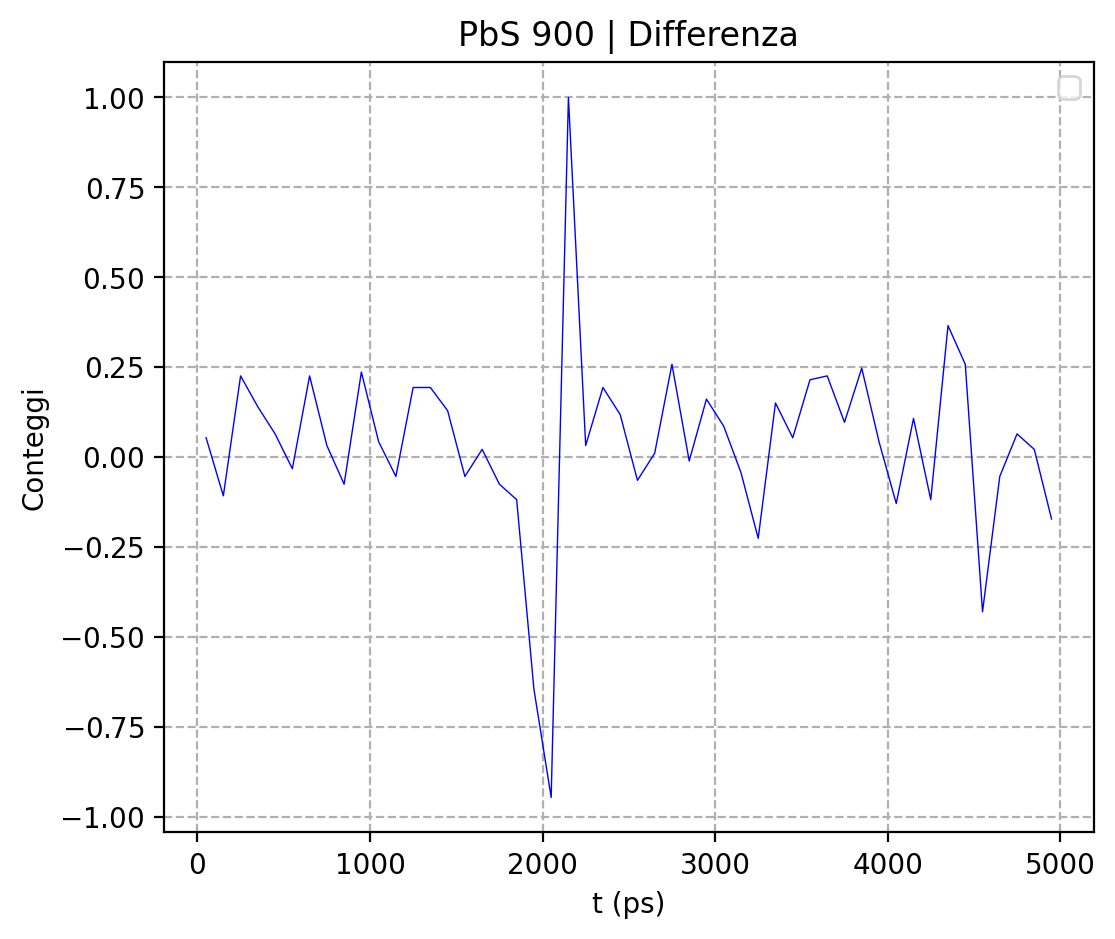

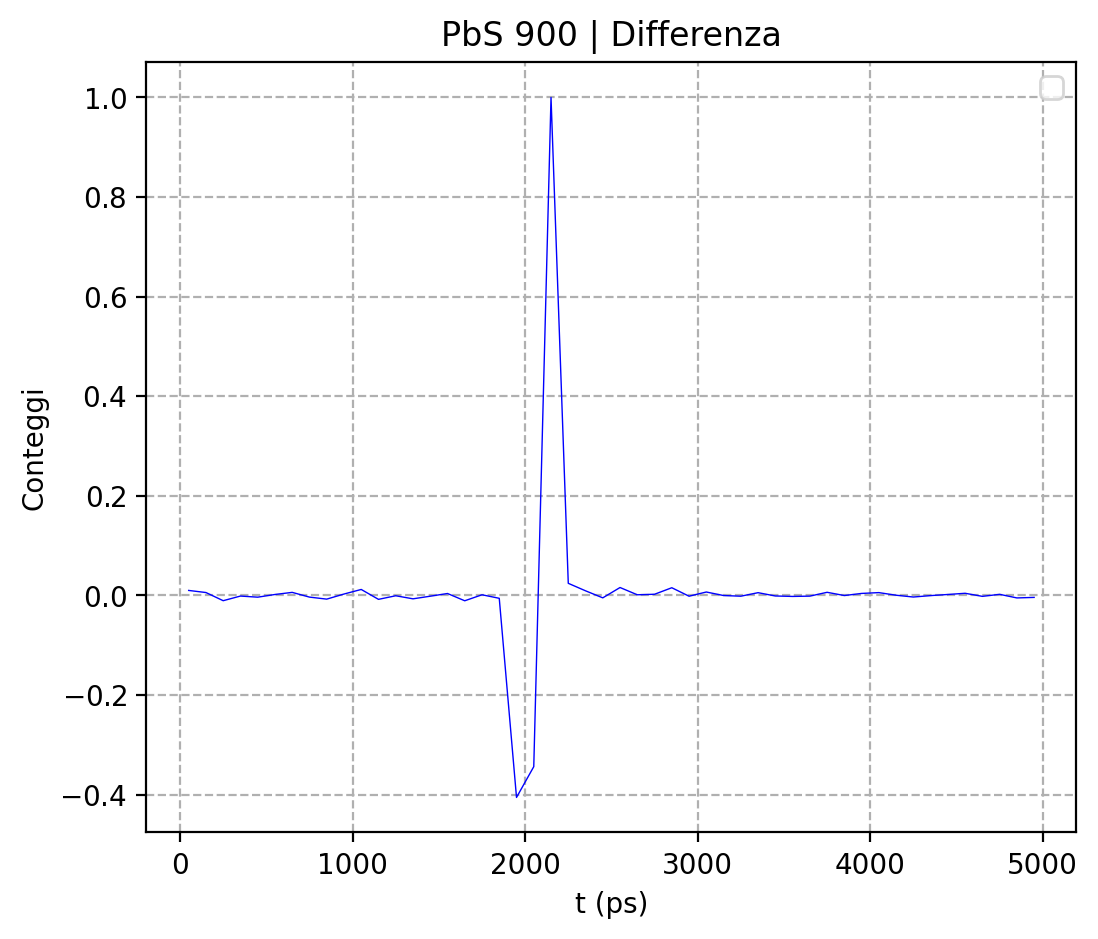

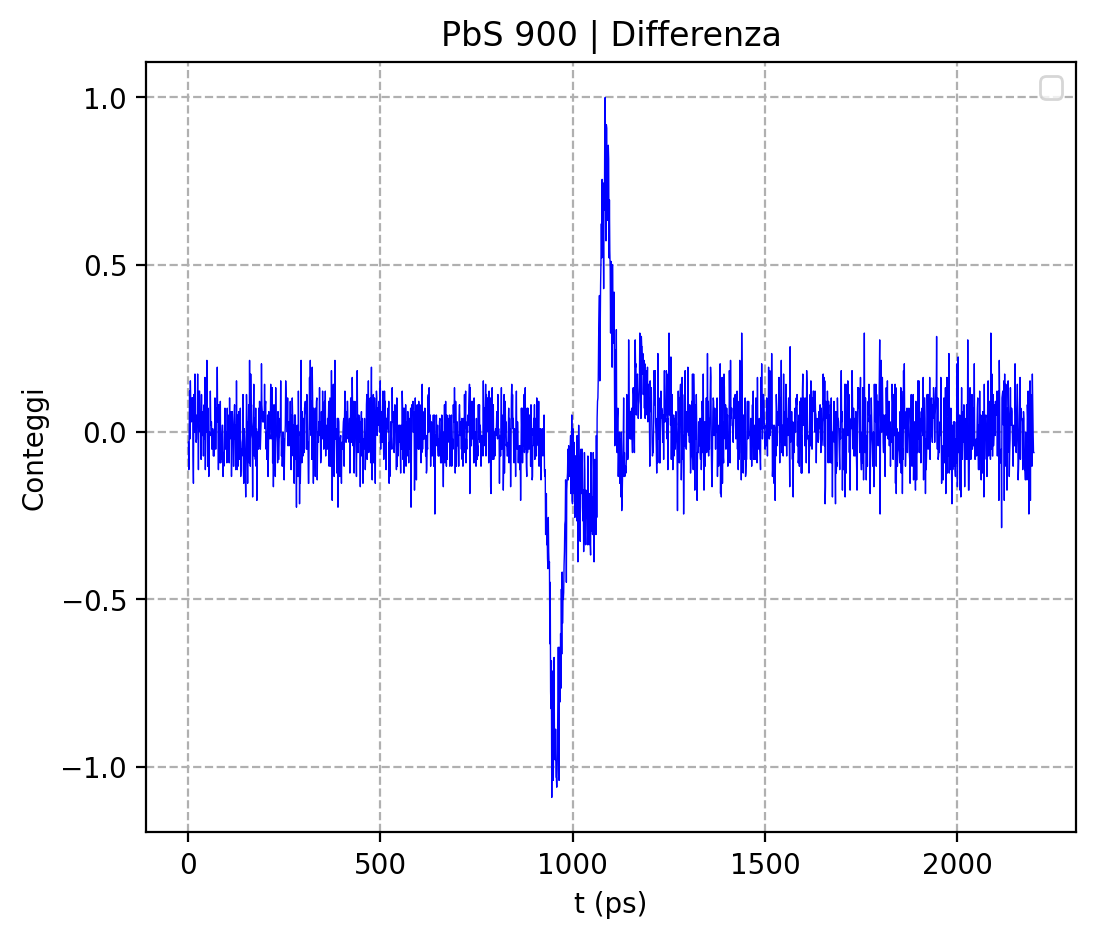

In [129]:
k = 0
for quadrupla in PbS_trpl:
    k += 1
    waveln = quadrupla[0]
    counts = quadrupla[1]
    
    # normalizzo i counts
    maximum = np.max(counts)
    counts = counts / maximum
    
    if k == 3: # per l'ultimo plotto solo regione 0 < x < 2000
        mask = (waveln > 0) & (waveln < 2200)
        waveln = waveln[mask]
        counts = counts[mask]
    else: # per i primi due plotto regione 0 < x < 5000
        mask = (waveln > 0) & (waveln < 5000)
        waveln = waveln[mask]
        counts = counts[mask]
    
    # Plot
    plt.figure(figsize=(6,5), dpi=200)
    plt.plot(waveln, counts, linestyle='-', color='b', linewidth=0.5)#, zorder=1)
    
    '''
    ## FIT ##
    
    # isolo regione 800 < x < 1200
    mask = (waveln > 800) & (waveln < 1200)
    x_fit = waveln[mask]
    y_fit = counts[mask]
    
    # imposto parametri: ogni entrata è una tripla (a, mu, sigma)
    params = [
        (1, 950, 50)
    ]
    
    # 'Appiattisco' la lista dei parametri iniziali
    par_flattened = np.array(params).flatten()
    
    # Set dei bounds per i parametri
    low = [0.01, 800, 10] * len(params)  # Limiti inferiori 
    upp = [1, 1200, 200] * len(params)  # Limiti superiori
    
    popt, pcov, chi2_reduced = fit_N_gaussiane(x_fit, y_fit, params, bounds=(low,upp), N_MAX_GAUSS=3, n_acq=5)
        
    ## PLOT CURVA FIT ##
    x_plot = np.linspace(800, 1200, 400)
    y_plot = N_gaussiane(x_plot, *popt)
    plt.plot(x_plot, y_plot, linestyle='--', color='orange', label=f"Fit", linewidth=1)#, zorder=2)
    
    # plotto anche i picchi individuati dal fit
    for i in range(0, round(len(popt)/3)): 
        x_picco = popt[3*i+1]
        y_picco = N_gaussiane(x_picco, *popt)
        plt.scatter(x_picco, y_picco, 
                    color=col[i], marker='x',
                    label='Picco '+str(i+1),
                    s=45, #alpha=0-1 per opacità
                    #zorder=3
                    )
        
    # plotto singolarmente le gaussiane
    for i in range(0, round(len(popt)/3)):
        y_gauss = gaussiana(x_plot, popt[3*i], popt[3*i+1], popt[3*i+2])
        plt.plot(x_plot, y_gauss, linestyle='--', color=col[i], linewidth=0.3, zorder=2)
    '''
    ## OPZIONI GRAFICHE ##
    plt.title(r'PbS 900 | Differenza')
    plt.xlabel("t (ps)")
    plt.ylabel("Conteggi")
    plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
    plt.legend()
    plt.grid(linestyle='--')
    #plt.tight_layout()
    plt.show()
    '''
    ## PRINT RISULTATI FIT ##
    for i in range(0, round(len(popt)/3)):
        print('• Gaussiana ', i+1)
        print(' - A =', popt[3*i])
        print(' - mu =', popt[3*i+1])
        print(' - sigma =', popt[3*i+2])
    print(' - chi2rid =', chi2_reduced)
    
    
    # estraggo da popt i parametri da usare per la prossima gaussiana
    params = [] # inizializzo
    for i in range(0, round(len(popt)/3)):
        params.append((popt[3*i], popt[3*i+1], popt[3*i+2]))'''

---

#### Plot emissione vs trasmissione

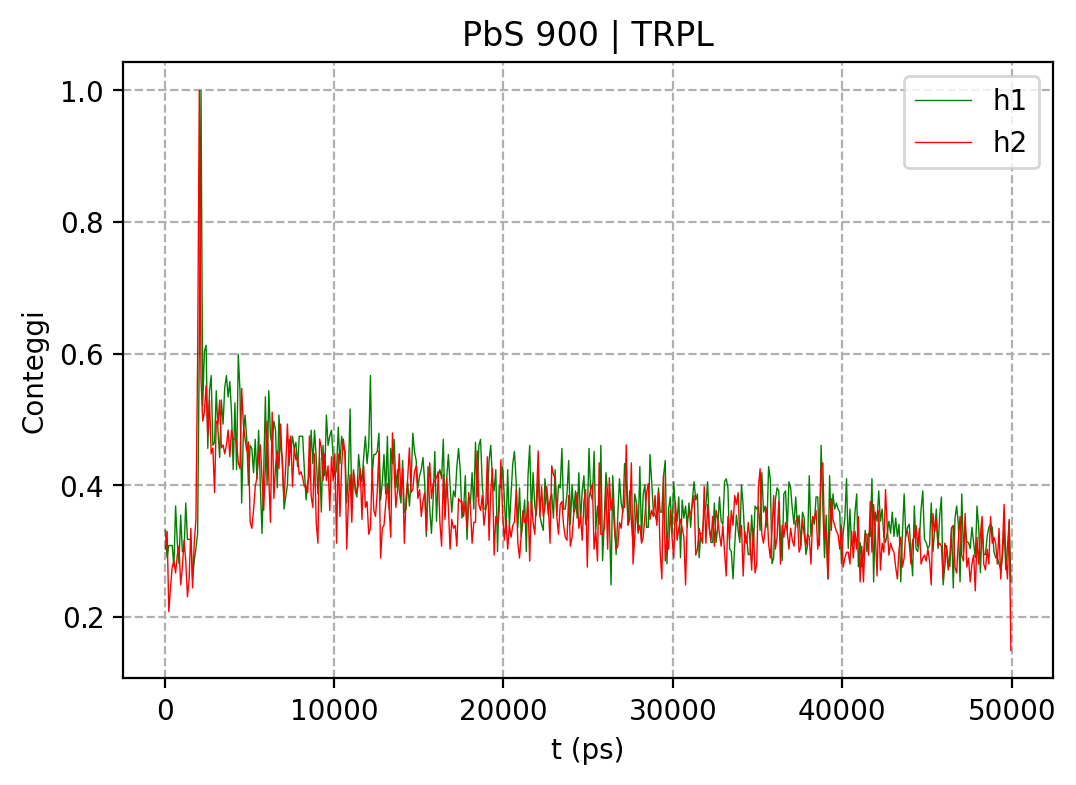

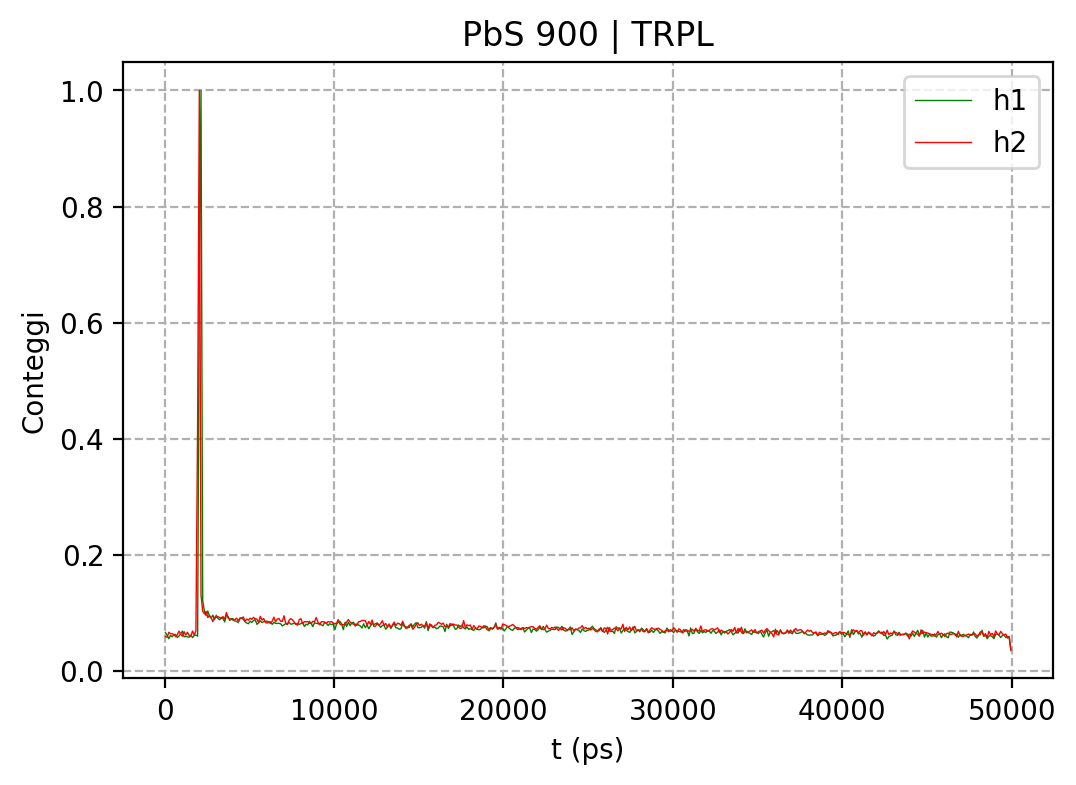

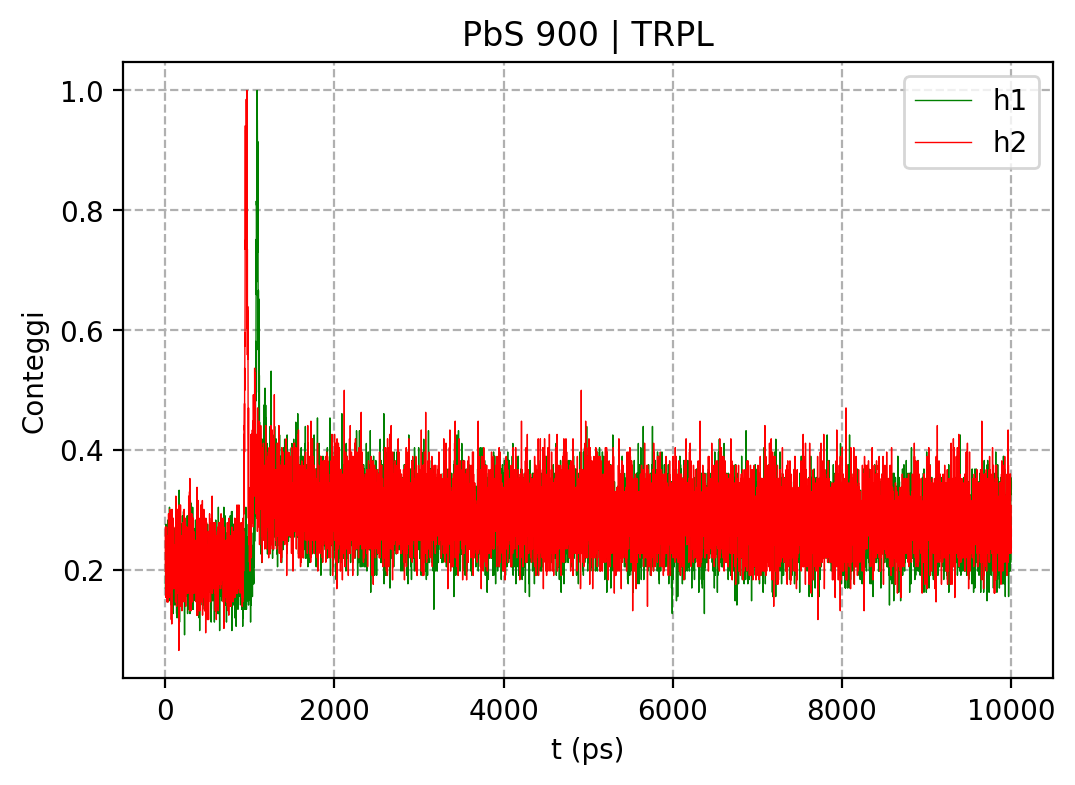

In [130]:
for quadrupla in PbS_trpl:
    waveln = quadrupla[0]
    emission = quadrupla[2]
    transmission = quadrupla[3]
    
    # normalizzo i counts
    maximum1 = np.max(emission)
    maximum2 = np.max(transmission)
    emission = emission / maximum1
    transmission = transmission / maximum2


    # Plot
    plt.figure(figsize=(6,4), dpi=200)
    plt.plot(waveln, emission, linestyle='-', color='g', linewidth=0.5, label='h1')#, zorder=1)
    plt.plot(waveln, transmission, linestyle='-', color='r', linewidth=0.5, label='h2')#, zorder=1)
    
    
    ## OPZIONI GRAFICHE ##
    plt.title(r'PbS 900 | TRPL')
    plt.xlabel("t (ps)")
    plt.ylabel("Conteggi")
    plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
    plt.legend()
    plt.grid(linestyle='--')
    #plt.tight_layout()
    plt.show()
    